In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_csv("iris.csv")
#quitamos las columnas que no tienen mucha correlacion con la clase
data = data.drop(columns=["Id"])
#indicamos que la columna de clase es tipo categorica 
data.Species=pd.Categorical(data.Species)
data.Species= data.Species.cat.codes
xtrain=data.iloc[:,:-1].to_numpy();
ytrain=data.iloc[:,-1].to_numpy();





[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [19]:
import random

def euclideana(x2,x1):
    return np.sqrt(np.sum(np.power(x2-x1,2)))

#clasificacion de una instancia
def clasificarEjemplo(x, y, aClasificar, k):
    cercanos=[]
    for i in range(k):
        cercanos.append([np.inf,0])
    #por todos los ejemplos que tenemos necesitamos calcular la distancia del elemento que queremos clasificar
    for i in range(len(x)):
        distancia=euclideana(x[i],aClasificar)
    #ver si la distancia es menor que alguno de los ejemplos que sabemos es cercano
        for j in range(k):
            if cercanos[j][0]>distancia:
                cercanos[j][0]=distancia
                cercanos[j][1]=y[i]
                break

    clase=dict()
    clase[0]=0
    clase[1]=0
    clase[2]=0
    for cercano in cercanos:
        clase[cercano[1]]+=1
    if clase[0]>clase[1] and clase[0]>clase[2]:
        return 0
    elif clase[1]>clase[0] and clase[1]>clase[2]:
        return 1
    elif clase[2]>clase[0] and clase[2]>clase[1]:
        return 2
    elif clase[0]==clase[1]:
        return random.choice([0, 1])
    elif clase[1]==clase[2]:
        return random.choice([1, 2])
    elif clase[0]==clase[2]:
        return random.choice([0, 2])


None


In [3]:
#clasificacion de todo un conjunto de datos
def clasificar(xtrain,ytrain,xtest,k):
    resultado=[]
    for ejemplo in xtest:
        resultado.append(clasificarEjemplo(xtrain,ytrain,ejemplo,k))
    return resultado

#para obtener accuracy
def accuracy(yobtained,yreal):
    correctos=0
    for i in range(len(yobtained)):
        if yobtained[i]==yreal[i]:
            correctos+=1
    return correctos/(len(yobtained))

In [4]:
def getData():
    #creando los datos de prueba y entrenamiento
    data_test=pd.DataFrame().reindex_like(data)
    data_test=data_test[:-75][:]

    data_training=pd.DataFrame().reindex_like(data)
    data_training=data_training[:-75][:]
    #agregando los datos aleatorios de setosa
    setos=random.sample(range(0,50),k=25)
    for i in range (len(setos)):
        data_test.loc[i,:]=data.loc[setos[i],:]

    for i in range (len(setos)):
        for j in range (50):
            if(j != setos[i]):
                data_training.loc[i,:]=data.loc[j,:]

    #agregando los datos aleatorios de versicolor
    versi=random.sample(range(51,100),k=25)
    for i in range (len(versi)):
        data_test.loc[i+25,:]=data.loc[versi[i],:]

    for i in range (len(versi)):
        for j in range (50,100):
            if(j != versi[i]):
                data_training.loc[i+25,:]=data.loc[j,:]

    #agregando los datos aleatorios de virginica
    virgi=random.sample(range(101,150),k=25)
    for i in range (len(virgi)):
        data_test.loc[i+50,:]=data.loc[virgi[i],:]

    for i in range (len(virgi)):
        for j in range (100,150):
            if(j != virgi[i]):
                data_training.loc[i+50,:]=data.loc[j,:]
    
    return data_training,data_test



In [5]:
accuracySplitTrain=[]
accuracySplitTest=[]
max_k=11
for k in range(1, max_k):
    a, b= getData()
    xtest=b.iloc[:,:-1].to_numpy();
    ytest=b.iloc[:,-1].to_numpy();
    xtrain=a.iloc[:,:-1].to_numpy();
    ytrain=a.iloc[:,-1].to_numpy();
    accuracySplitTrain.append(accuracy(clasificar(xtrain,ytrain,xtrain,k),ytrain))
    accuracySplitTest.append(accuracy(clasificar(xtrain,ytrain,xtest,k),ytest))
print("Entrenamiento:", accuracySplitTrain, "Clasificacion:", accuracySplitTest)

Entrenamiento: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] Clasificacion: [0.88, 0.9066666666666666, 0.8666666666666667, 0.8933333333333333, 0.8666666666666667, 0.8933333333333333, 0.8533333333333334, 0.9066666666666666, 0.9066666666666666, 0.8933333333333333]


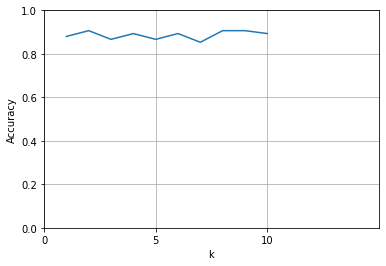

In [6]:
import matplotlib.pyplot as plt
def k_accuracy_plot(max_k=10):
  plt.grid(True)
  plt.xlabel("k")
  plt.ylabel("Accuracy")
  plt.xlim([0, max_k + 5])
  plt.ylim([0, 1])
  plt.xticks(range(0, max_k + 5, 5))

  return plt

k_accuracy_plot().plot(range(1, max_k), accuracySplitTest);

In [7]:
#Probando KNN con fold cross validation
idx=data.index.values
np.random.shuffle(idx)
folds=10
datosPorFold=len(idx)//folds
accuracy1=[]
accuracy2=[]
accuracyTesting=[]
accuracyTraining=[]
for k in range (1, max_k):
    for f in range(0,folds):
        idxTest=idx[f*datosPorFold:(f+1)*datosPorFold]
        Xtrain=data.iloc[~data.index.isin(idxTest),:-1].to_numpy()
        Ytrain=data.iloc[~data.index.isin(idxTest),-1].to_numpy()
        Xtest=data.iloc[idxTest,:-1].to_numpy()
        Ytest=data.iloc[idxTest,-1].to_numpy()
        accuracy1.append(accuracy(clasificar(Xtrain,Ytrain,Xtrain,k),Ytrain))
        accuracy2.append(accuracy(clasificar(Xtrain,Ytrain,Xtest,k),Ytest))
    accuracyTraining.append(np.average(accuracy1))
    accuracyTesting.append(np.average(accuracy2))
print("Train:")
print(accuracyTraining)
print("Test:")
print(accuracyTesting)

Train:
[1.0, 0.9903703703703706, 0.9849382716049384, 0.9803703703703703, 0.9762962962962963, 0.9729629629629629, 0.9694179894179893, 0.965462962962963, 0.9608230452674899, 0.9547407407407406]
Test:
[1.0, 0.9966666666666667, 0.9888888888888889, 0.9833333333333334, 0.9786666666666666, 0.9755555555555556, 0.9714285714285716, 0.9675, 0.9629629629629631, 0.9573333333333334]


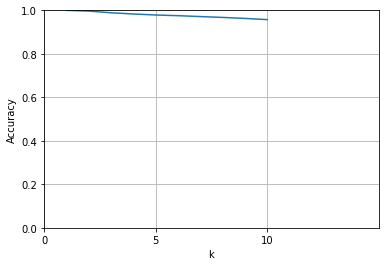

In [8]:
k_accuracy_plot().plot(range(1, max_k), accuracyTesting);